In [1]:
# Цель проекта: провести разведывательный анализ данных и получить параметры прогнозирующей модели.
# Задачи: на основе данных выявить зависимости между переменными; определить набор переменных, с помощью которых 
# можно вычислить искомую (целевую) величину.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

def option(column):      
    cols = habitat[column]
    print(pd.DataFrame(cols).info())
    print(cols.value_counts())
    print(cols.hist())
    print(cols.describe())


habitat = pd.read_csv('stud_math.xls')   
display(habitat)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [2]:
habitat.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
# Загрузка датасета. Оценка качества данных (полнота/пропуски). 
# Датасет содержит 395 наблюдений по 30 признакам, из которых 13 - числовые переменные, 17 - номинативные величины. 

In [4]:
pd.set_option('display.max_columns', 30)    # Показать все столбцы
habitat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [5]:
# Оценка качества данных (полнота/пропуски, аномалии/выбросы) по каждому признаку. 
# Сглаживание аномалий (удаление выбросов), подсчет количества пропущенных значений и оценка влияния пропусков на распределение
# значений переменной.  Выбор значения величины для замены выбросов и пропущенных данных.  Выбор варианта использования
# пропусков: с заменой или без их учета. 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
GP    349
MS     46
Name: school, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     395
unique      2
top        GP
freq      349
Name: school, dtype: object


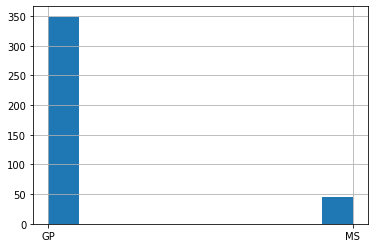

In [6]:
option('school')    # school — аббревиатура школы, в которой учится ученик


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
F    208
M    187
Name: sex, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     395
unique      2
top         F
freq      208
Name: sex, dtype: object


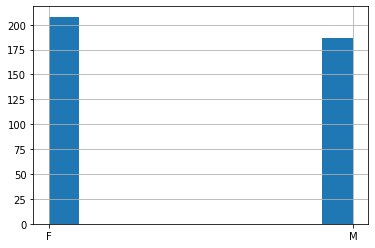

In [7]:
option('sex')     # sex — пол ученика ('F' - женский, 'M' - мужской)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
None
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


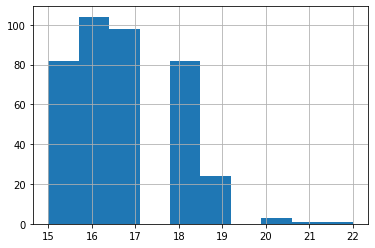

In [8]:
option('age')     # age — возраст ученика (от 15 до 22)

In [9]:
# Выбросы значений переменной age: 20, 21, 22  

In [10]:
habitat = habitat.query('age < 20')    # Удаление выбросов
habitat = habitat.reindex(range(390),method='ffill')    
habitat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2.0,2.0,at_home,other,other,NaN,NaN,3.0,0.0,no,no,yes,no,yes,-9.0,yes,NaN,no,5.0,3.0,3.0,4.0,2.0,50.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     390 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
None
16    104
17     98
18     83
15     82
19     23
Name: age, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    390.000000
mean      16.643590
std        1.197103
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       19.000000
Name: age, dtype: float64


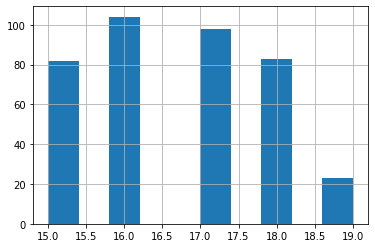

In [11]:
option('age')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
U    292
R     82
Name: address, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     374
unique      2
top         U
freq      292
Name: address, dtype: object


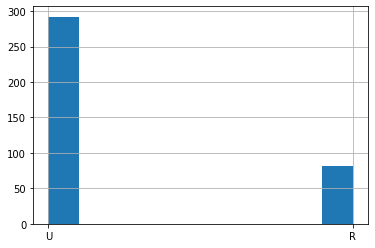

In [12]:
option('address')    # address — тип адреса ученика ('U' - городской, 'R' - за городом)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  345 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
T    311
A     34
Name: Pstatus, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     345
unique      2
top         T
freq      311
Name: Pstatus, dtype: object


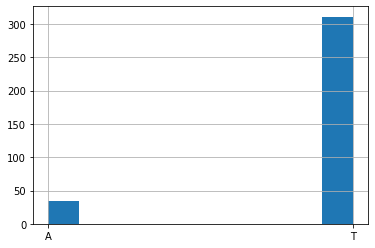

In [13]:
option('Pstatus')     # Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  363 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
GT3    260
LE3    103
Name: famsize, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     363
unique      2
top       GT3
freq      260
Name: famsize, dtype: object


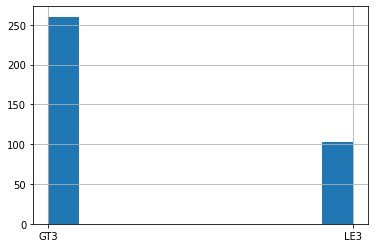

In [14]:
option('famsize')    # famsize — размер семьи('LE3' <= 3, 'GT3' >3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  362 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
mother    248
father     86
other      28
Name: guardian, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count        362
unique         3
top       mother
freq         248
Name: guardian, dtype: object


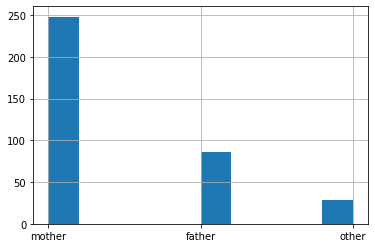

In [15]:
option('guardian')    # guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
50.0     54
55.0     46
0.0      37
75.0     32
65.0     32
60.0     32
40.0     30
70.0     27
45.0     25
80.0     15
30.0     15
90.0     11
35.0      8
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    384.000000
mean      52.200521
std       22.895241
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


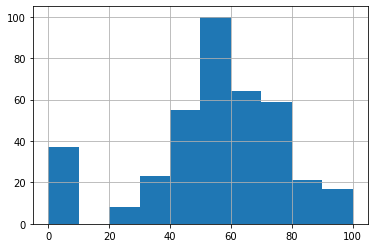

In [16]:
option('score')    # score — баллы по госэкзамену по математике

In [17]:
habitat['score'] = habitat['score'].fillna(0)    
habitat['score'] = habitat['score'].replace(0, habitat['score'].median())    # Удаление выбросов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   390 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
55.0     89
50.0     54
65.0     32
75.0     32
60.0     32
40.0     30
70.0     27
45.0     25
80.0     15
30.0     15
90.0     11
35.0      8
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    390.000000
mean      57.461538
std       15.167185
min       20.000000
25%       50.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64


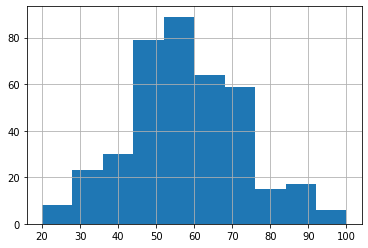

In [18]:
option('score')

In [19]:
# Разумно предположить, что распределение баллов должно быть близким к нормальному.  Оценка диаграммы удовлетворительна.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  363 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
 4.0    183
 5.0     95
 3.0     61
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    363.000000
mean       3.933884
std        0.920025
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


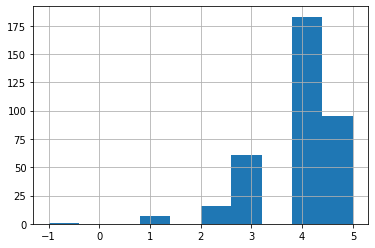

In [20]:
option('famrel')    # famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [21]:
(habitat['famrel']).fillna(0)
habitat['famrel'] = habitat['famrel'].replace(-1, 1)    # Удаление выбросов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  363 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
4.0    183
5.0     95
3.0     61
2.0     16
1.0      8
Name: famrel, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    363.000000
mean       3.939394
std        0.896073
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


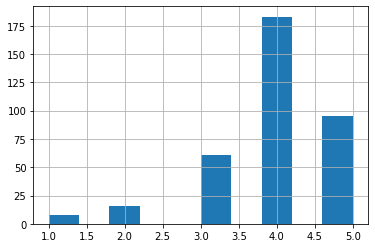

In [22]:
option('famrel')

In [23]:
# Выброс скорее всего опечатка. Разумно предположить, что ошибка в знаке величины.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
4.0    130
2.0    103
3.0     93
1.0     58
0.0      3
Name: Medu, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    387.000000
mean       2.746770
std        1.100145
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


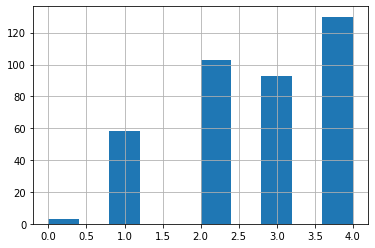

In [24]:
option('Medu')     # Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
                                              # 3 - среднее специальное или 11 классов, 4 - высшее)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    366 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
2.0     102
3.0      97
4.0      89
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    366.000000
mean       2.639344
std        2.239370
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


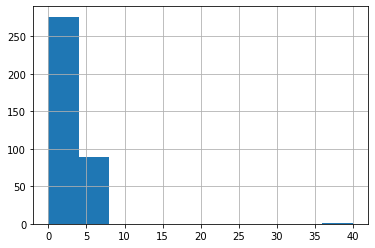

In [25]:
option('Fedu')    # Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
                                           # 3 - среднее специальное или 11 классов, 4 - высшее)

In [26]:
# Выброс скорее всего опечатка. Разумно предположить, что ошибка в порядке величины.

In [27]:
habitat['Fedu'] = habitat['Fedu'].replace(40, 4)    # Удаление выбросов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    366 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
2.0    102
3.0     97
4.0     90
1.0     75
0.0      2
Name: Fedu, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    366.000000
mean       2.540984
std        1.089030
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


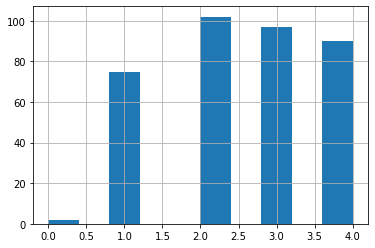

In [28]:
option('Fedu')

<AxesSubplot:>

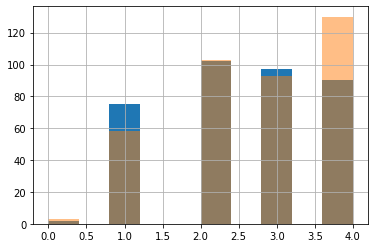

In [29]:
(habitat['Fedu']).hist()     
(habitat['Medu']).hist(alpha=0.5)

In [30]:
# Образования родителей скоррелированы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    371 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
other       133
services     94
at_home      58
teacher      55
health       31
Name: Mjob, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count       371
unique        5
top       other
freq        133
Name: Mjob, dtype: object


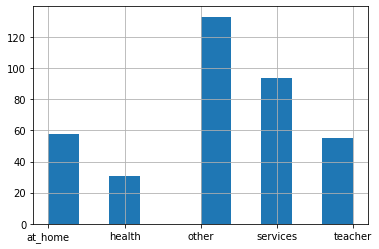

In [31]:
option('Mjob')     # Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения,
                                          # 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    354 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
other       195
services     99
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count       354
unique        5
top       other
freq        195
Name: Fjob, dtype: object


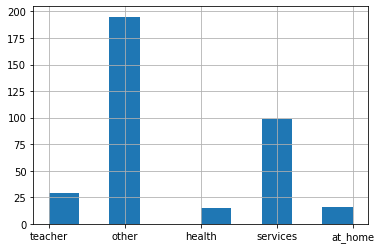

In [32]:
option('Fjob')    # Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения,
                                        #'services' - гос служба, 'at_home' - не работает, 'other' - другое)

<AxesSubplot:>

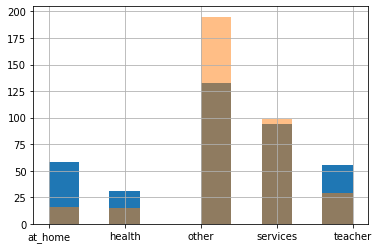

In [33]:
(habitat['Mjob']).hist()    
(habitat['Fjob']).hist(alpha=0.5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  374 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
course        132
home          105
reputation    104
other          33
Name: reason, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count        374
unique         4
top       course
freq         132
Name: reason, dtype: object


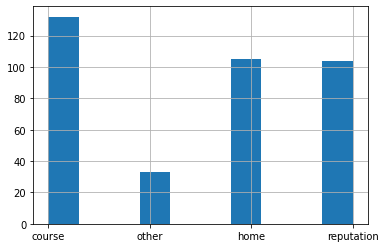

In [34]:
option('reason')    #  reason — причина выбора школы ('home' - близость к дому,'reputation' - репутация школы,
                                                    # 'course' - образовательная программа, 'other' - другое)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  383 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
no     332
yes     51
Name: schoolsup, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     383
unique      2
top        no
freq      332
Name: schoolsup, dtype: object


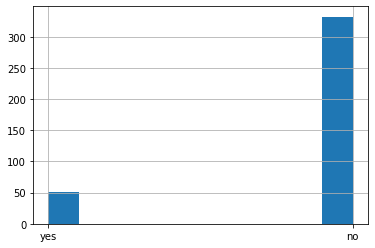

In [35]:
option('schoolsup')    # schoolsup — дополнительная образовательная поддержка (yes или no)

In [36]:
# Группировка переменных по некоторому общему признаку.  Например, в исследуемом датасете 4 группы переменных: семья, школа,
# личность и дополнительные факторы. Необходимо выявить связи внутри группы и группы с целевой переменной. 

<AxesSubplot:>

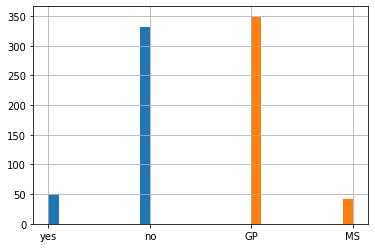

In [37]:
(habitat['schoolsup']).hist()
habitat['school'].hist()

In [38]:
# В школе с аббревиатурой GP, нет дополнительной образовательной поддержки.

In [39]:
print(habitat.groupby(habitat['schoolsup'])['score'].describe())

           count       mean        std   min   25%   50%   75%    max
schoolsup                                                            
no         332.0  58.975904  14.942165  20.0  50.0  55.0  70.0  100.0
yes         51.0  48.431373  12.747164  25.0  40.0  50.0  55.0   85.0


In [40]:
print(habitat.groupby(habitat['school'])['score'].describe())

        count       mean       std   min   25%   50%   75%    max
school                                                           
GP      349.0  57.851003  15.27885  20.0  50.0  55.0  70.0  100.0
MS       41.0  54.146341  13.91503  25.0  50.0  55.0  60.0   95.0


In [41]:
# Результаты экзамена по математике в школе с аббревиатурой GP(где нет дополнительной образовательной поддержки)
# в среднем выше, чем в школе MS.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  362 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
1.0    238
2.0     95
3.0     21
4.0      8
Name: traveltime, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    362.000000
mean       1.444751
std        0.704939
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


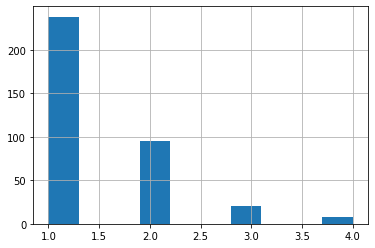

In [42]:
option('traveltime')    # traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин.,
                                                     # 3 - 30-60 мин., 4 - >60 мин.)

In [43]:
# Основная часть учеников имеет минимальные затраты времени на путь до школы. Скорее всего, школа находится недалеко от места
# проживания детей.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
U    292
R     82
Name: address, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     374
unique      2
top         U
freq      292
Name: address, dtype: object


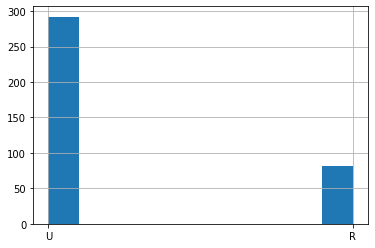

In [44]:
option('address')    # address — тип адреса ученика ('U' - городской, 'R' - за городом)

<AxesSubplot:>

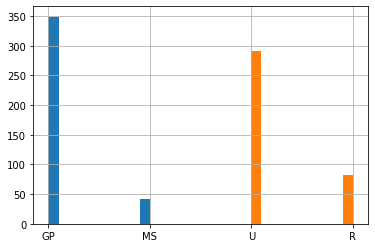

In [45]:
habitat['school'].hist()
(habitat['address']).hist()

In [46]:
# Школа с аббревиатурой GP, скорее всего имеет адрес типа 'U' - городской.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
2.0    194
1.0     98
3.0     64
4.0     27
Name: studytime, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    383.000000
mean       2.052219
std        0.839090
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


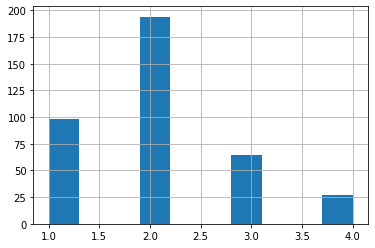

In [47]:
option('studytime')    # studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов,
                                                   # 3 - 5-10 часов, 4 - >10 часов)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  371 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
yes    353
no      18
Name: higher, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     371
unique      2
top       yes
freq      353
Name: higher, dtype: object


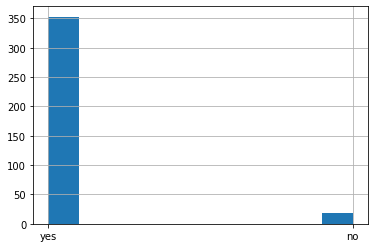

In [48]:
option('higher')    # higher — хочет получить высшее образование (yes или no)

In [49]:
# переменная higher практически имеет одно значение - yes.  Поэтому скорее всего, эта величина будет бесполезна.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  377 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
yes    195
no     182
Name: activities, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     377
unique      2
top       yes
freq      195
Name: activities, dtype: object


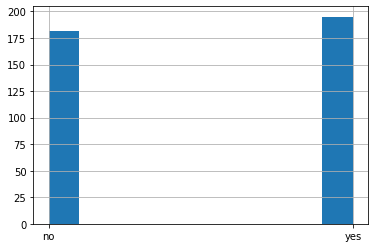

In [50]:
option('activities')    #  activities — дополнительные внеучебные занятия (yes или no)

In [51]:
# Распределение значений переменной activities практически одинаково.  Это наиболее благоприятные условия для выявления влияния
# данной величины на целевую переменную score.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    348 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
no     195
yes    153
Name: paid, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     348
unique      2
top        no
freq      195
Name: paid, dtype: object


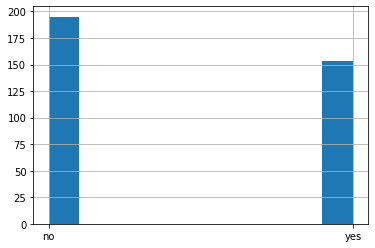

In [52]:
option('paid')    # paid — дополнительные платные занятия по математике (yes или no)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
yes    218
no     132
Name: famsup, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     350
unique      2
top       yes
freq      218
Name: famsup, dtype: object


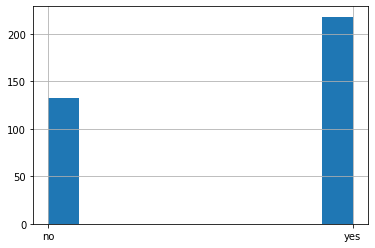

In [53]:
option('famsup')    # famsup — семейная образовательная поддержка (yes или no)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
yes    303
no      53
Name: internet, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     356
unique      2
top       yes
freq      303
Name: internet, dtype: object


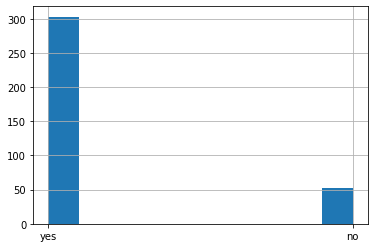

In [54]:
option('internet')    #  internet — наличие интернета дома (yes или no)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  379 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
3.0    154
4.0    109
2.0     63
5.0     35
1.0     18
Name: freetime, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    379.000000
mean       3.211082
std        0.985495
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


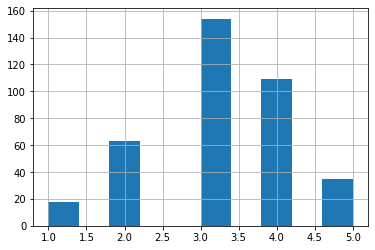

In [55]:
option('freetime')    #  freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   382 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
3.0    124
2.0    103
4.0     83
5.0     50
1.0     22
Name: goout, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    382.000000
mean       3.094241
std        1.111391
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


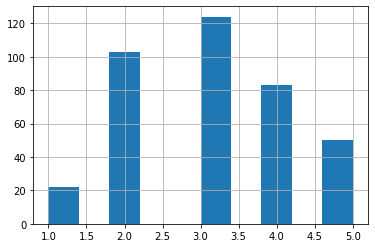

In [56]:
option('goout')    # goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

<AxesSubplot:>

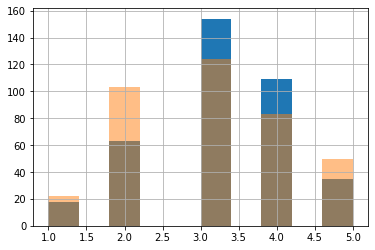

In [57]:
(habitat['freetime']).hist()
(habitat['goout']).hist(alpha=0.5)      

In [58]:
# Переменные freetime и goout скоррелированы.  Свободное (вне школы) время (freetime) учащихся в основном занимает общение
# с друзьями (goout).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
no     237
yes    122
Name: romantic, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     359
unique      2
top        no
freq      237
Name: romantic, dtype: object


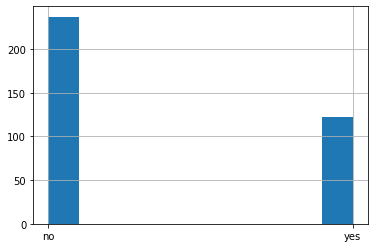

In [59]:
option('romantic')    # romantic — в романтических отношениях (yes или no) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
0.0    291
1.0     50
2.0     14
3.0     13
Name: failures, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    368.000000
mean       0.317935
std        0.711528
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


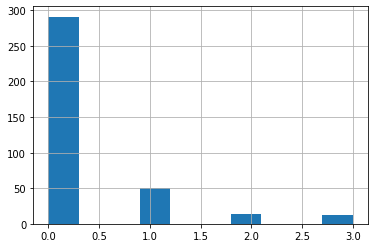

In [60]:
option('failures')    #  failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [61]:
# Можно сказать, что большая часть детей имеет негативный опыт решения личных проблем.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  375 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
5.0    135
3.0     88
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    375.000000
mean       3.528000
std        1.392739
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


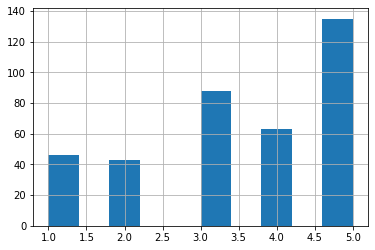

In [62]:
option('health')    # health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [63]:
# Состояние здоровья детей: 25% - неудовлетворительное, 25% - удовлетворительное, и половина от общей численности - хорошее. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  378 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
0.0      109
2.0       61
4.0       53
6.0       31
8.0       22
10.0      17
14.0      12
12.0      12
3.0        6
7.0        6
16.0       6
18.0       5
5.0        4
20.0       4
1.0        3
22.0       3
9.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
17.0       1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
28.0       1
Name: absences, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    378.000000
mean       6.769841
std       21.118020
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


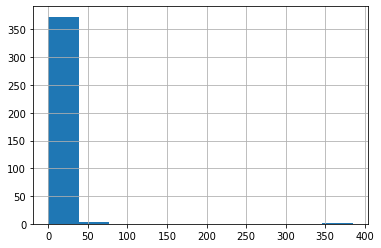

In [64]:
option('absences')    # absences — количество пропущенных занятий

In [65]:
# Удаление выбросов. Замена пустых значений переменной на медиану.
habitat['absences'] = habitat['absences'].fillna(4).apply(lambda x: habitat['absences'].median() if x>30 else x)

In [66]:
# Разумно предположить, что зависимость частоты распределения пропущенных занятий от их количества - функция убывающая.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  390 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None
0.0     109
4.0      71
2.0      61
6.0      31
8.0      22
10.0     17
12.0     12
14.0     12
16.0      6
7.0       6
3.0       6
18.0      5
5.0       4
20.0      4
22.0      3
1.0       3
9.0       3
13.0      2
11.0      2
15.0      2
17.0      1
25.0      1
26.0      1
23.0      1
28.0      1
21.0      1
30.0      1
19.0      1
24.0      1
Name: absences, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    390.000000
mean       5.084615
std        5.717022
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64


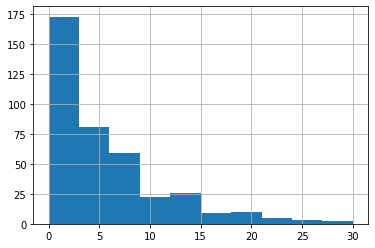

In [67]:
option('absences')

In [68]:
habitat.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.166853,-0.125315,0.110433,0.023714,0.148633,-0.023714,0.028459,-0.023592,0.123825,-0.062578,0.146027,-0.128536
Medu,-0.166853,1.000000,0.626699,-0.199723,0.066414,-0.248913,-0.066414,-0.018495,0.028406,0.071440,-0.039166,0.113863,0.173349
Fedu,-0.125315,0.626699,1.000000,-0.163876,-0.014352,-0.252898,0.014352,-0.023690,-0.008027,0.057086,0.014500,0.023519,0.132835
traveltime,0.110433,-0.199723,-0.163876,1.000000,-0.094487,0.075056,0.094487,-0.009435,-0.028631,0.037610,-0.022346,-0.012512,-0.084714
studytime,0.023714,0.066414,-0.014352,-0.094487,1.000000,-0.177526,-1.000000,0.034582,-0.107928,-0.047502,-0.076017,-0.092040,0.131035
failures,0.148633,-0.248913,-0.252898,0.075056,-0.177526,1.000000,0.177526,-0.056627,0.067632,0.108691,0.113156,0.091796,-0.248132
"studytime, granular",-0.023714,-0.066414,0.014352,0.094487,-1.000000,0.177526,1.000000,-0.034582,0.107928,0.047502,0.076017,0.092040,-0.131035
famrel,0.028459,-0.018495,-0.023690,-0.009435,0.034582,-0.056627,-0.034582,1.000000,0.152035,0.078910,0.084840,-0.099464,0.048821
freetime,-0.023592,0.028406,-0.008027,-0.028631,-0.107928,0.067632,0.107928,0.152035,1.000000,0.301851,0.069212,0.035121,-0.016899
goout,0.123825,0.071440,0.057086,0.037610,-0.047502,0.108691,0.047502,0.078910,0.301851,1.000000,0.005048,0.107447,-0.177882


In [69]:
# Матрица корреляции для числовых данных. Отберем переменные с наибольшим коэффициентом корреляции для искомой величины
# (score).  

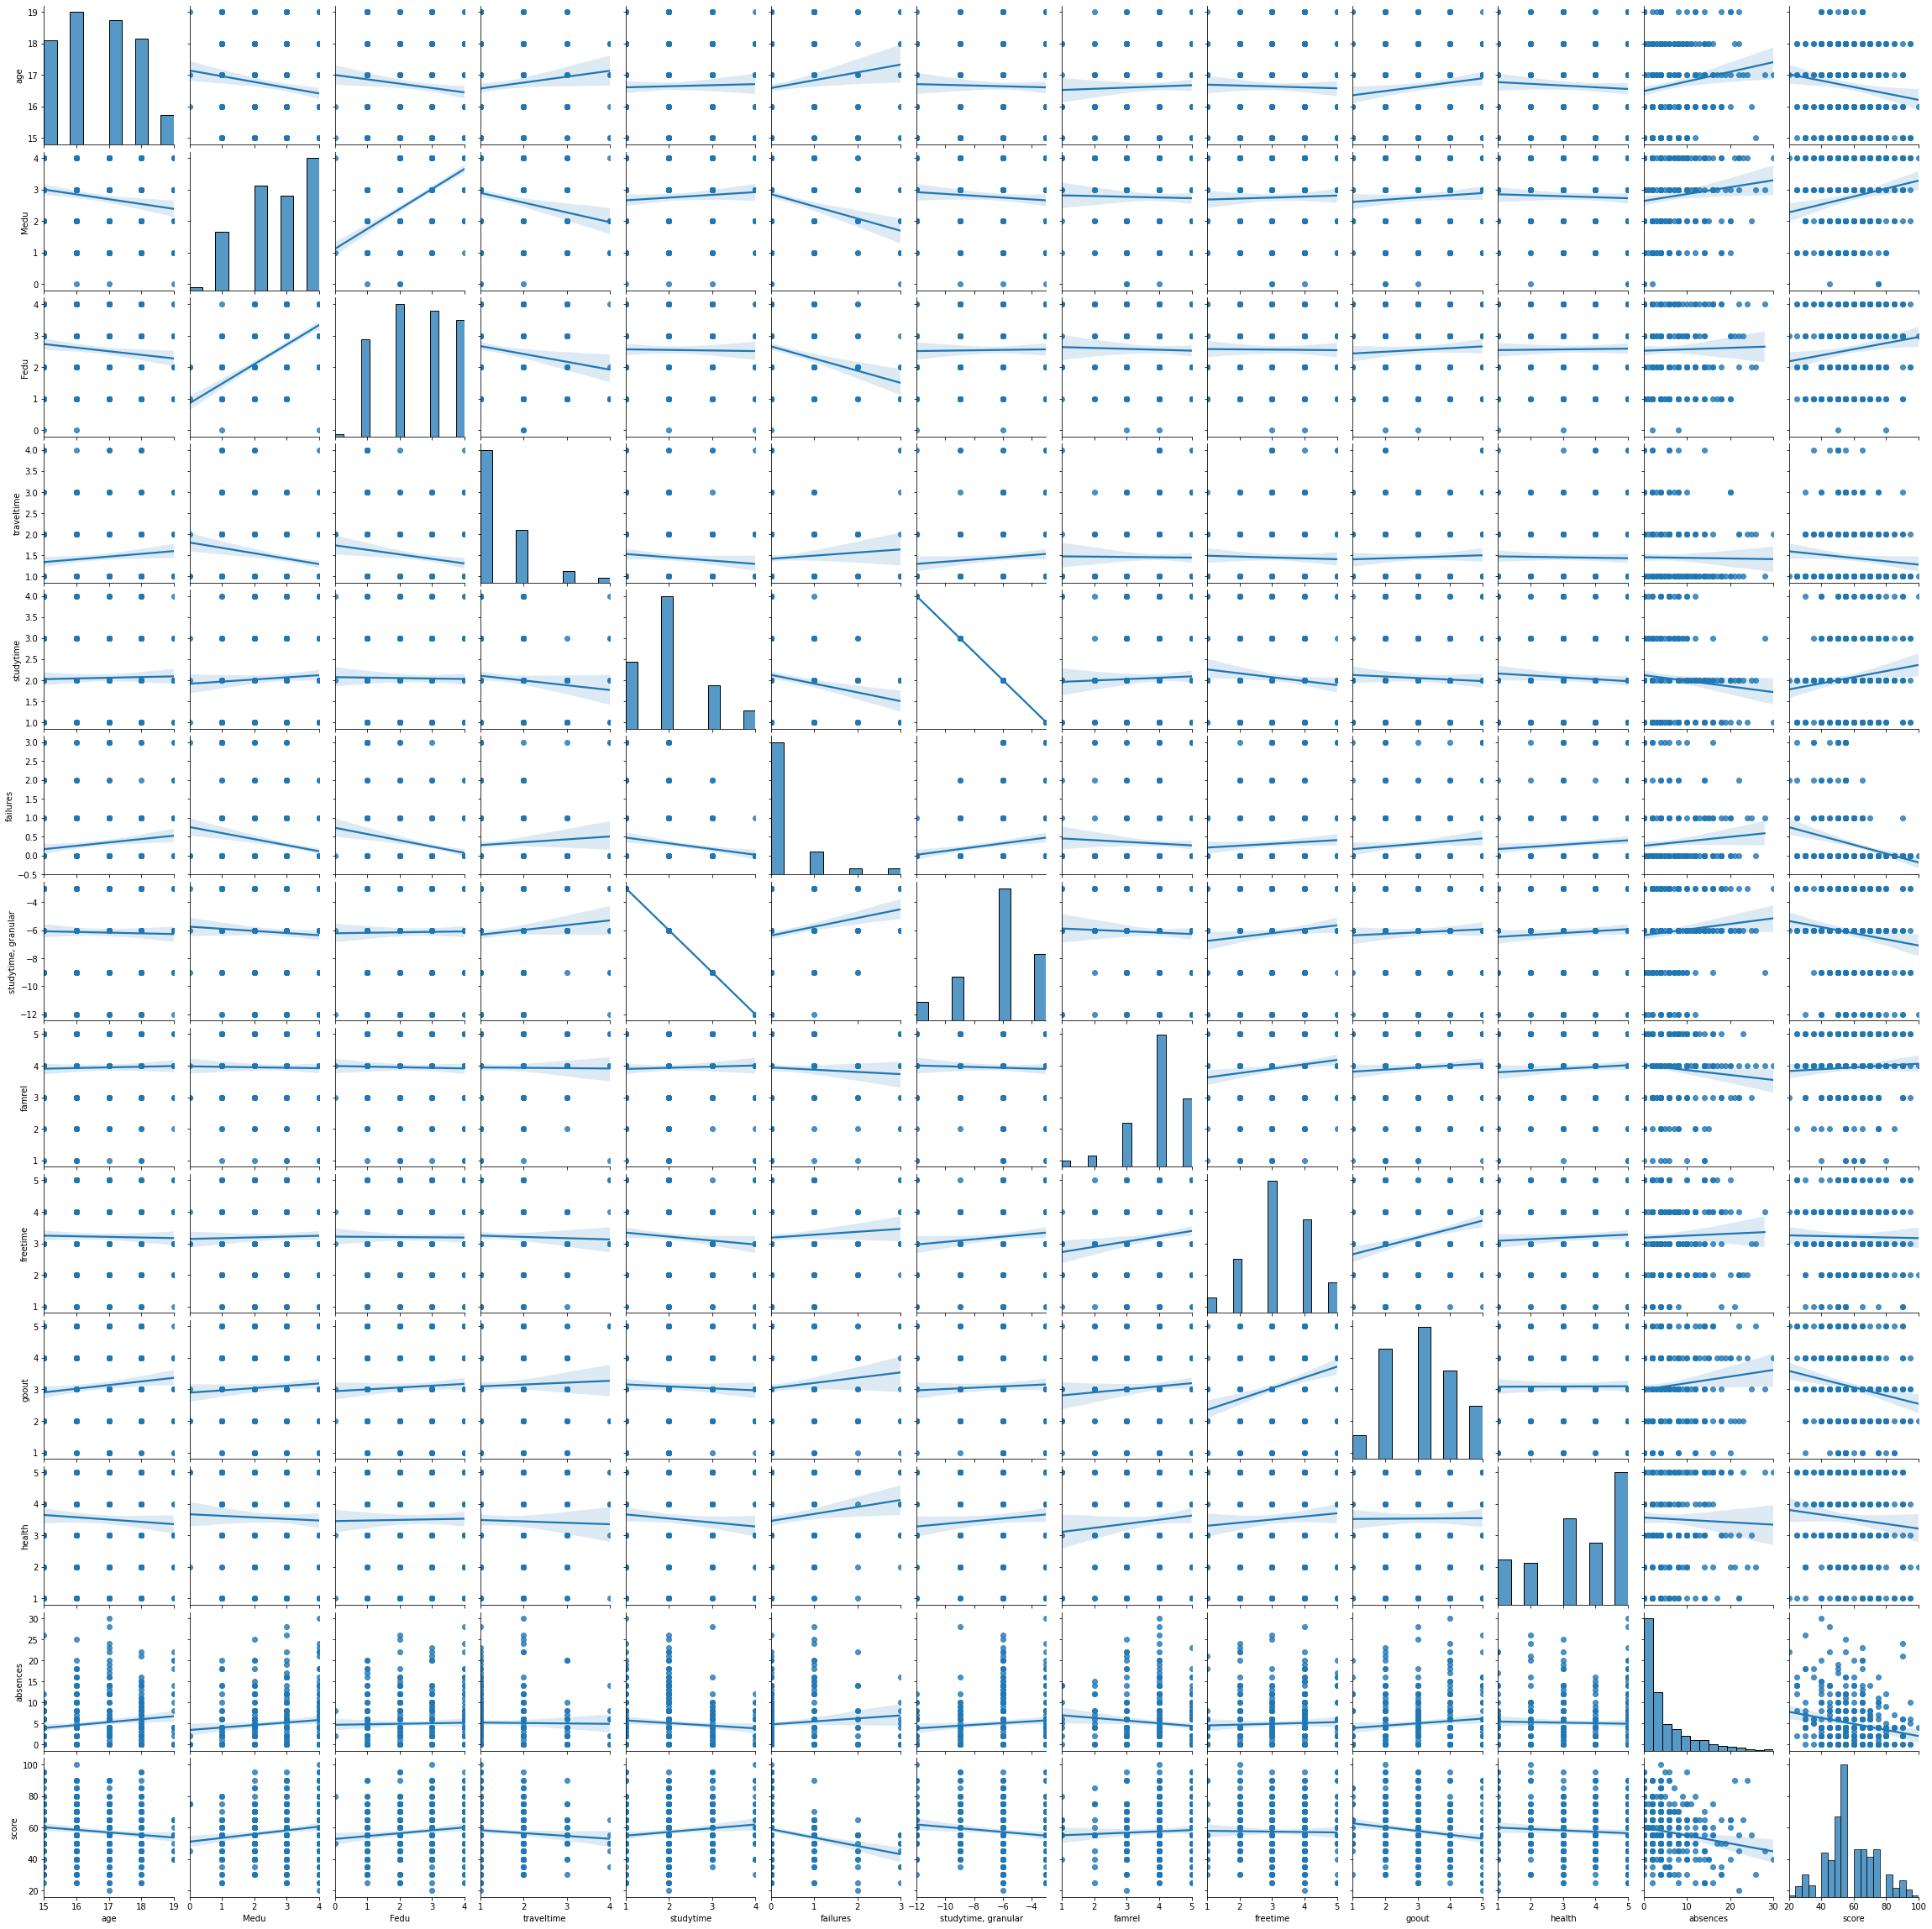

In [70]:
sns.pairplot(habitat, kind='reg')

In [71]:
# Вывод: корреляционный анализ числовых переменных (использовались графики зависимости переменных и матрица корреляций) показал,
# что значимое влияние на предсказываемую величину (score) оказывают 7 параметров: age, Medu, Fedu, studytime, failures, goout,
# absences. Причем Medu, Fedu, studytime имеют положительную корреляцию с искомой величиной (score); 
# age, failures, goout, absences - отрицательную. 
# Последовательность расположения параметров по мере убывания их влияния (в порядке убывания модуля коэффициента корреляции): 
# failures, absences, goout, Medu, Fedu, studytime, age.    
# У переменных: freetime, traveltime, famrel, health  - низкая корреляция с успеваемостью по математике. Их можно исключить.
# Дополнительным фактором, в пользу принятия этого решения, является более выраженная положительная корреляция пары переменных:
# failures, health  и age, traveltime.
# Переменные studytime и studytime, granular полностью скоррелированы. Поэтому оставим одну переменную - studytime 
# (время на учёбу помимо школы). studytime, granular - предположительно неучебное время (т.к. corr= -1). 
# Переменные Medu (образование матери) и Fedu (образование отца) скоррелированы с corr=0,63. Можно оставить одну переменную -
# Medu или Fedu. 
# Итак, оставим в датасете 6 числовых переменных для дальнейшего использования в качестве параметров модели: age, Medu, 
# studytime, failures, goout, absences.

In [72]:
habitat = habitat.drop(['Fedu', 'studytime, granular', 'freetime', 'traveltime', 'famrel', 'health' ], axis=1)
habitat

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,absences,score
0,GP,F,18,U,NaN,A,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,at_home,other,other,mother,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,2.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2.0,at_home,other,other,NaN,3.0,0.0,no,no,yes,no,yes,yes,NaN,no,3.0,2.0,50.0
386,MS,F,18,R,GT3,T,4.0,teacher,at_home,reputation,mother,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,services,other,course,mother,3.0,1.0,no,no,no,yes,no,yes,yes,no,2.0,0.0,55.0
388,MS,F,18,U,LE3,T,3.0,teacher,services,course,mother,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,0.0,40.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  374 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
yes    300
no      74
Name: nursery, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     374
unique      2
top       yes
freq      300
Name: nursery, dtype: object


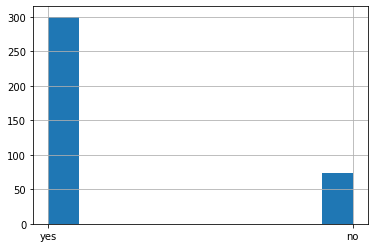

In [73]:
option('nursery')     # nursery — посещал детский сад (yes или no)

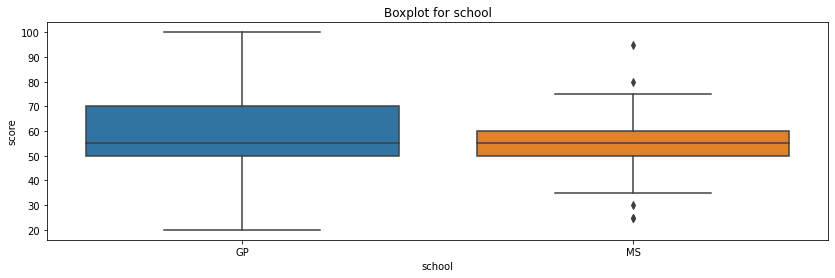

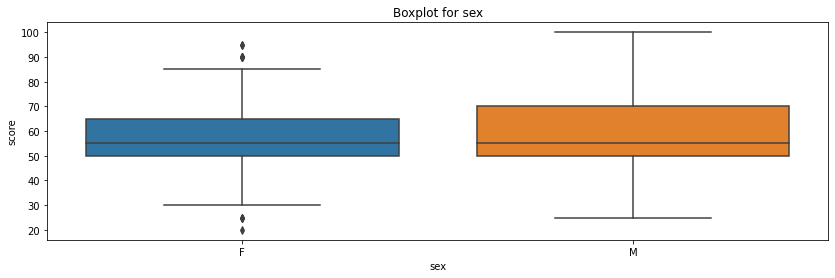

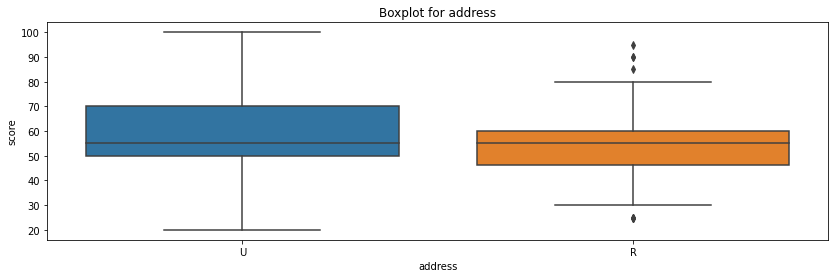

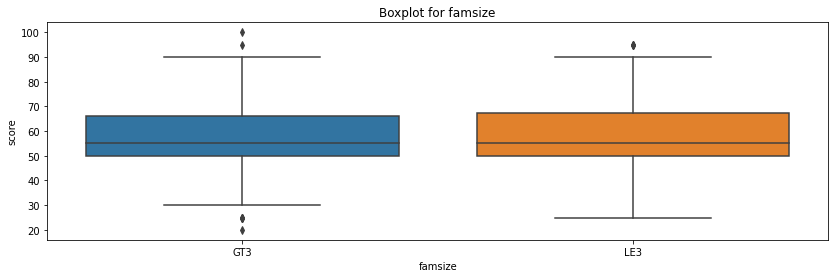

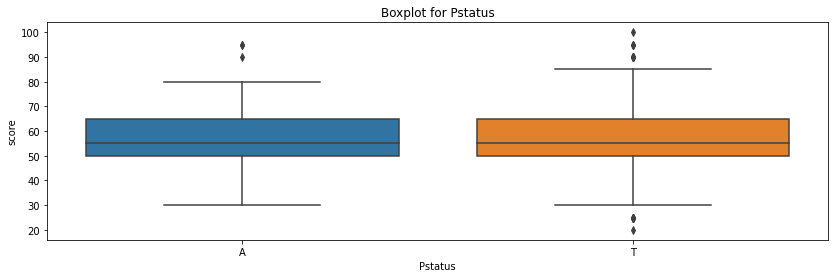

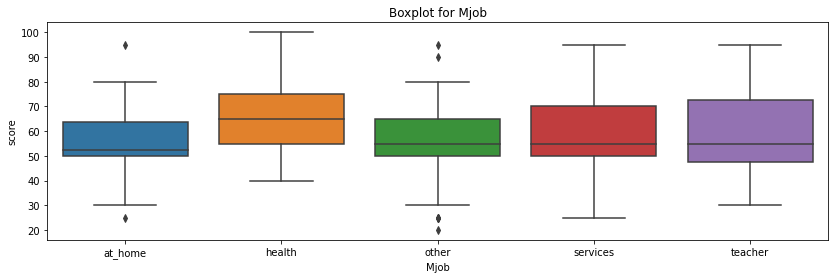

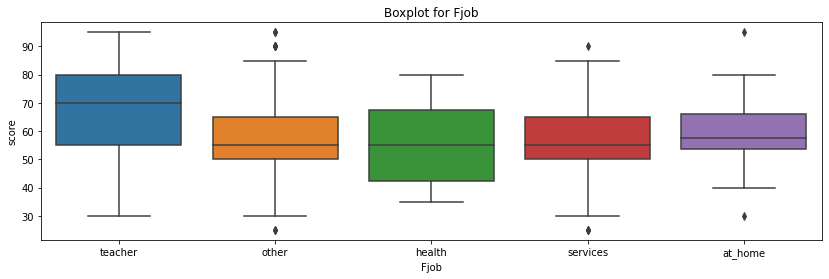

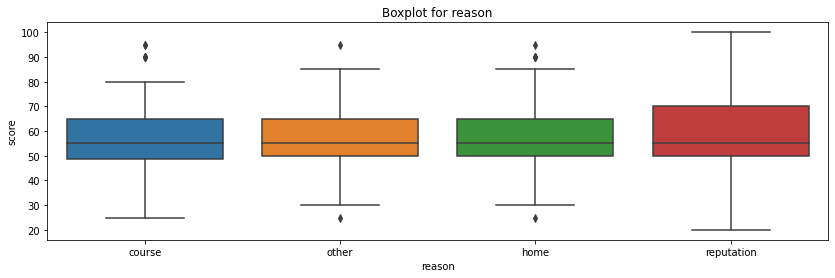

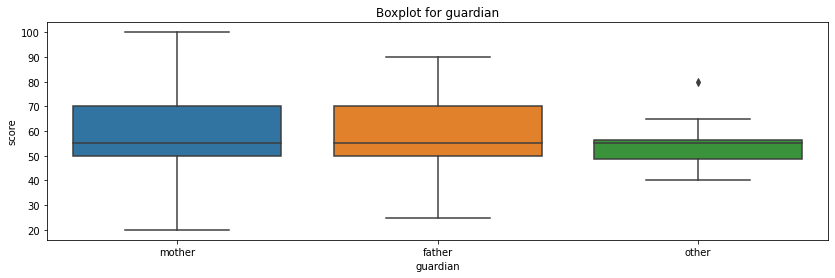

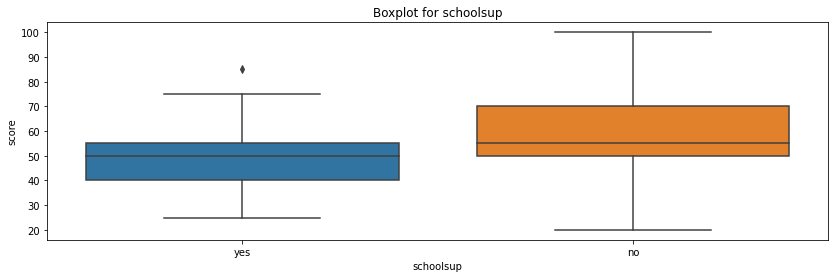

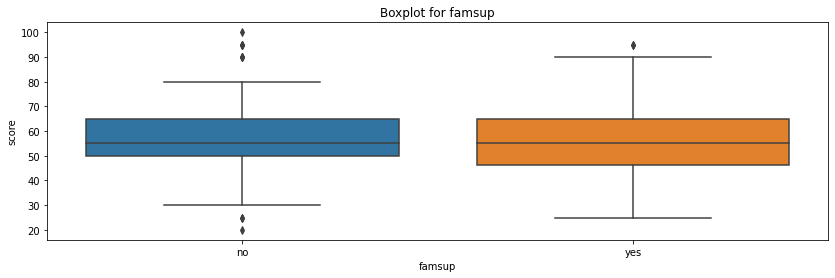

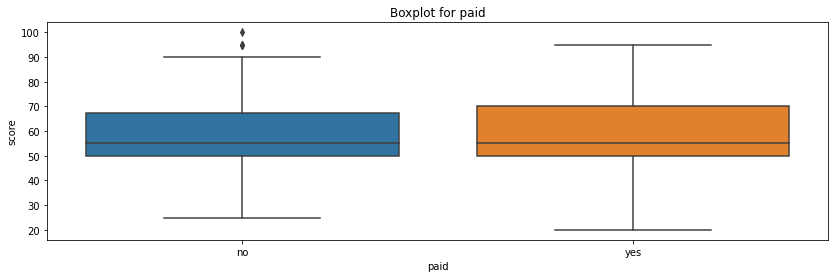

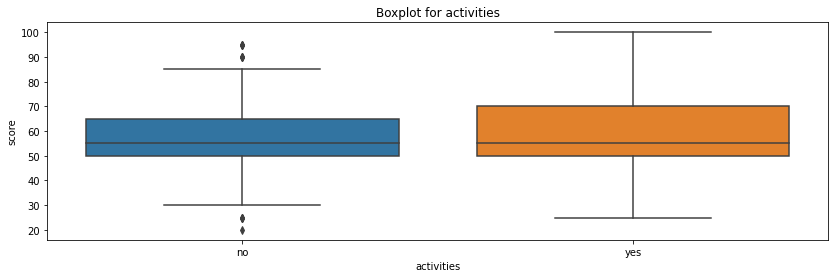

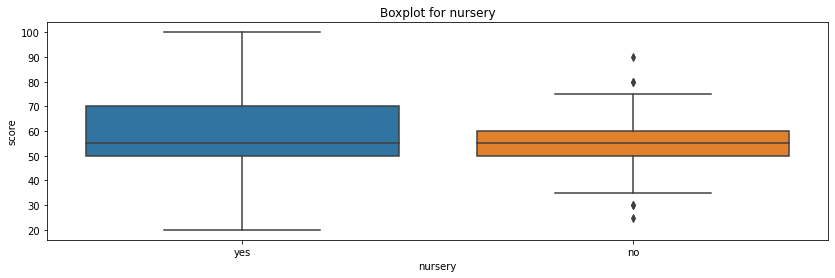

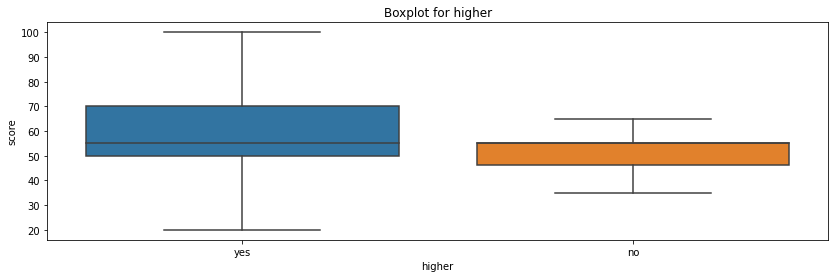

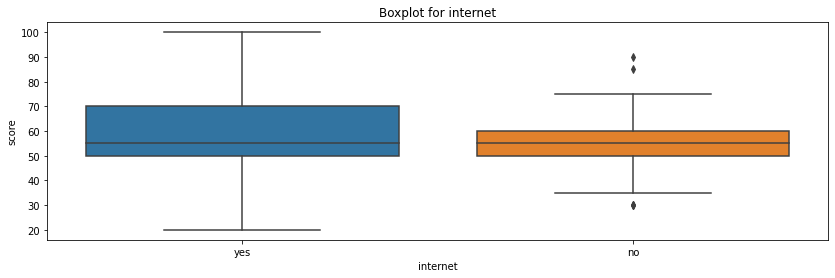

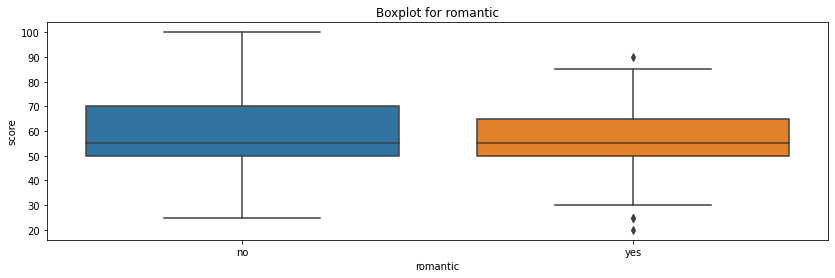

In [74]:
def boxplot_(column):
    fig,ax=plt.subplots(figsize=(14,4))
    sns.boxplot(x=column, y='score', data= habitat, )
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    boxplot_(col)

# Визуализация номинативных величин с помощью метода boxplot.    

In [75]:
def get_stat_dif(column):
    cols = habitat[column].value_counts().index[:15]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(habitat.loc[habitat[column] == comb[0], 'score'], 
                        habitat.loc[habitat[column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
# Тест Стьюдента - статистический метод.              

In [76]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


In [77]:
# Выводы: визуализация номинативных величин с помощью метода box-plot и результаты теста Стьюдента показали, что значимыми 
# переменными являются: sex, address, Mjob, Fjob, schoolsup. Оставим эти величины в датасете для построения модели. 

In [78]:
habitat_for_model = habitat.drop(['school', 'famsize', 'Pstatus', 'reason', 'guardian',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
habitat_for_model.columns    # оставляем переменные с наибольшим влиянием на целевую величину

Index(['sex', 'age', 'address', 'Medu', 'Mjob', 'Fjob', 'studytime',
       'failures', 'schoolsup', 'goout', 'absences', 'score'],
      dtype='object')

In [79]:
# Выводы:  с помощью EDA для анализа влияния условий жизни учащихся на их успеваемость по математике, были получены следующие 
# результаты:
# в данных незначительное количество пустых значений, что позволило использовать датасет без заполнения пропусков и 
# внесения  искажения  в данные; 
# выбросы найдены в столбцах: age, score, absences, Fedu, famrel. Для работы с выбросами были использованы следующие методы: 
# удаление данных (строк датасета) содержащих выбросы (переменная age), замена выбросов на медиану переменной (score),
# ограничение значения переменной и замены на медиану всех значений превышающих границу (absences);
# выбросы величин Fedu, famrel очевидно являются опечатками, исправления которых имеют предположительный характер;
# на основе анализа данных выбраны переменные с наибольшим влиянием на предсказываемую величину (score).  Устранено дублирование
# - выбрана переменная, представляющая группу скореллированных величин;
# из 30 признаков представленных в датасете выбраны 12. 

# Итак, в качестве параметров модели для прогноза результатов экзамена по математике выбраны следующие переменные:
# age, Medu, studytime, failures, goout, absences, sex, address, Mjob, Fjob, schoolsup. Модель содержит 11 параметров. 